## XGBoost

In [1]:
# 导入必不可少的一些数据处理库
import numpy as np
import pandas as pd
import time
import copy
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence # 直接获取pdp数组的方法
from scipy.interpolate import splev, splrep # 数据平滑插值
import xgboost  as xgb

In [2]:
data=pd.read_excel(r'data.xlsx')
chuli=data.iloc[:,:5]
chuli.columns=['h','dg','o','charge','pass-wa']
chuli

,h,dg,o,charge,pass-wa
0,0.7,1.3,0.4913,-0.1,257.92
1,0.8,1.3,0.0000,-0.1,303.89
2,0.8,1.3,0.4913,-0.1,289.23
3,0.8,1.3,0.9825,-0.1,195.35
4,0.8,1.3,1.4737,-0.1,158.72
...,...,...,...,...,...
731,1.0,1.1,1.7190,0.2,150.15
732,1.1,1.1,0.0000,0.2,194.88
733,1.1,1.1,0.7369,0.2,191.84
734,1.1,1.1,1.2810,0.2,186.53


In [3]:
X=chuli.drop(['pass-wa'],axis=1)
y=chuli['pass-wa']
X

,h,dg,o,charge
0,0.7,1.3,0.4913,-0.1
1,0.8,1.3,0.0000,-0.1
2,0.8,1.3,0.4913,-0.1
3,0.8,1.3,0.9825,-0.1
4,0.8,1.3,1.4737,-0.1
...,...,...,...,...
731,1.0,1.1,1.7190,0.2
732,1.1,1.1,0.0000,0.2
733,1.1,1.1,0.7369,0.2
734,1.1,1.1,1.2810,0.2


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=67)

In [5]:
param_test1 = {
 'max_depth':range(4,12,1),
 'n_estimators':range(20,220,20),
 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
 'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1 ]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(), param_grid = param_test1)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_,gsearch1.best_score_

({'gamma': 0.6, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 140},
 0.9572162599109347)

In [7]:
gb = xgb.XGBRegressor(gamma =0.6,learning_rate= 0.05,max_depth = 5,n_estimators = 140)

In [8]:
gb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.6, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=140, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
a = gb.score(X_train,y_train)
a

0.9816836573698455

In [10]:
b = gb.score(X_test,y_test)
b

0.9572324472482777

In [11]:
# 评估特征重要性
gb.feature_importances_

array([0.05271689, 0.7932871 , 0.07352149, 0.08047453], dtype=float32)

In [17]:
from pdpbox import pdp, info_plots

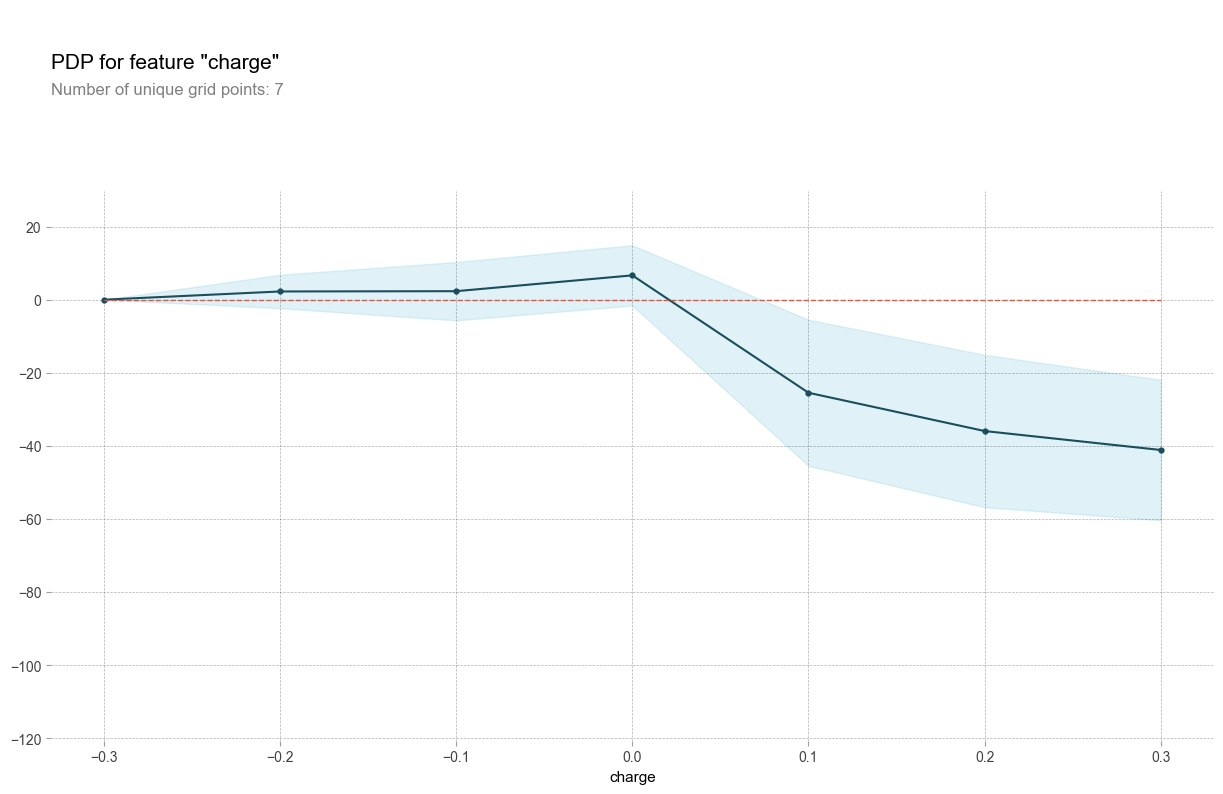

In [37]:
feature_names = ['h','dg','o','charge']
feat_name = 'charge'
pdp_goals1 = pdp.pdp_isolate(model=gb, dataset=X_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'charge')
plt.show()

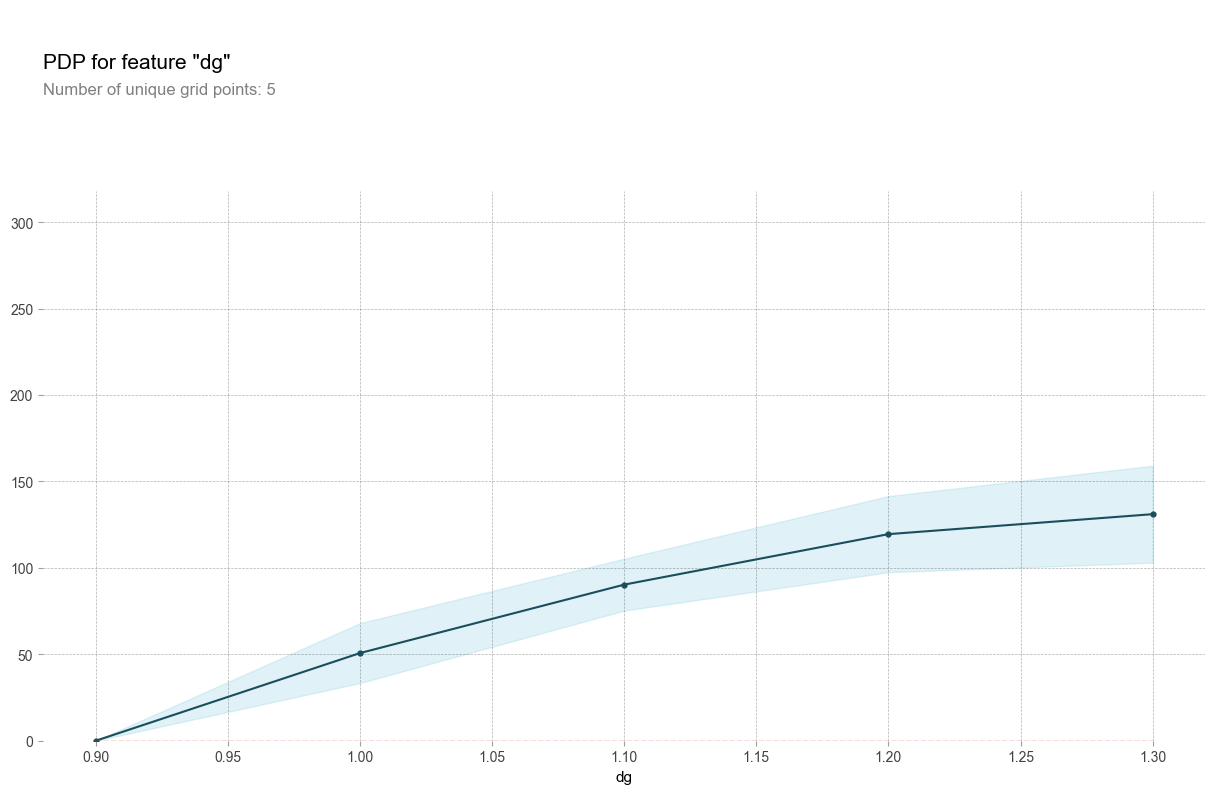

In [38]:
feat_name = 'dg'
pdp_goals2 = pdp.pdp_isolate(model=gb, dataset=X_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals2, 'dg')
plt.show()

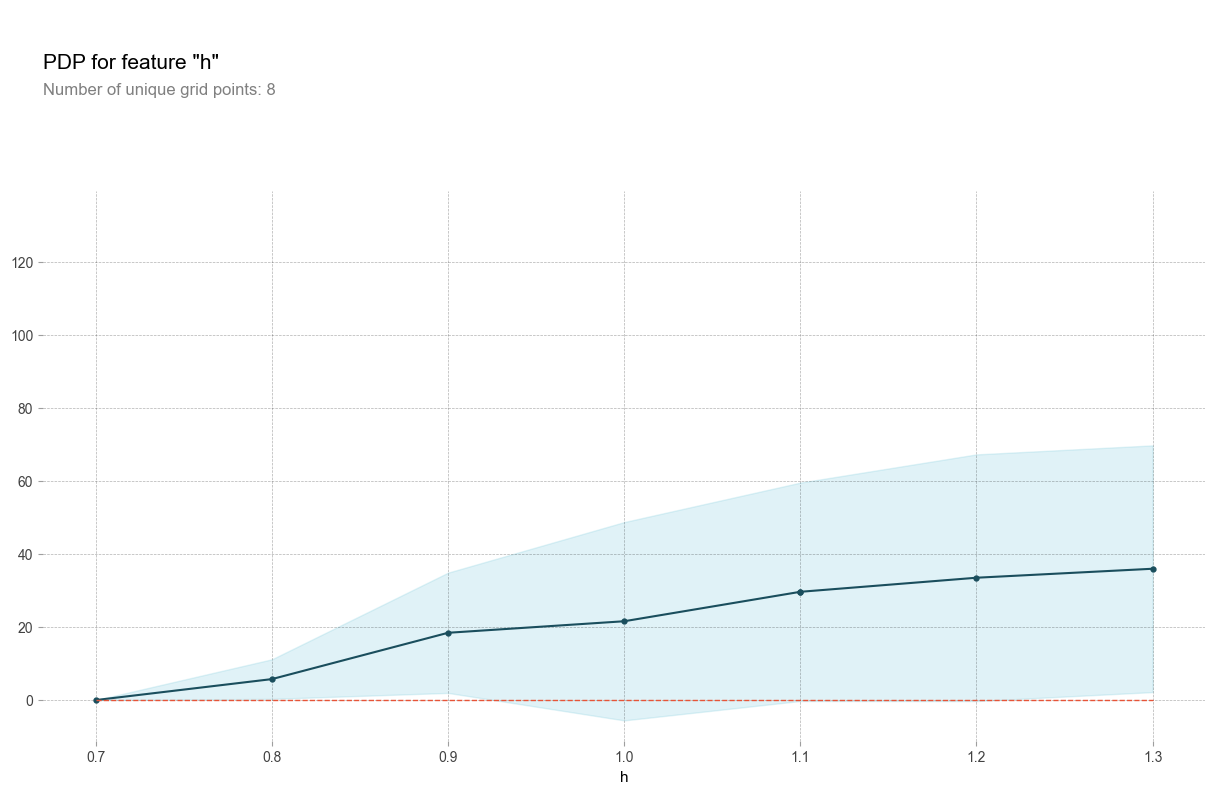

In [39]:
feat_name = 'h'
pdp_goals3 = pdp.pdp_isolate(model=gb, dataset=X_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals3, 'h')
plt.show()

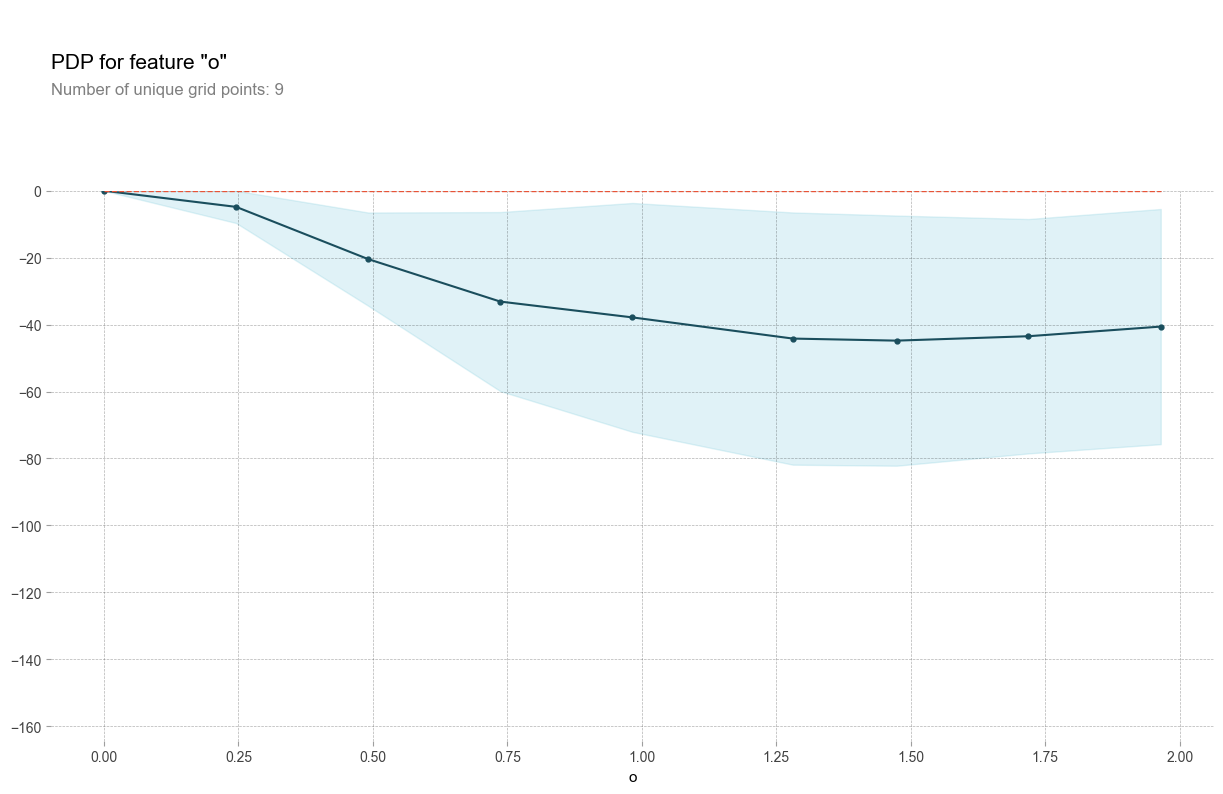

In [40]:
feat_name = 'o'
pdp_goals4 = pdp.pdp_isolate(model=gb, dataset=X_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals4, 'o')
plt.show()

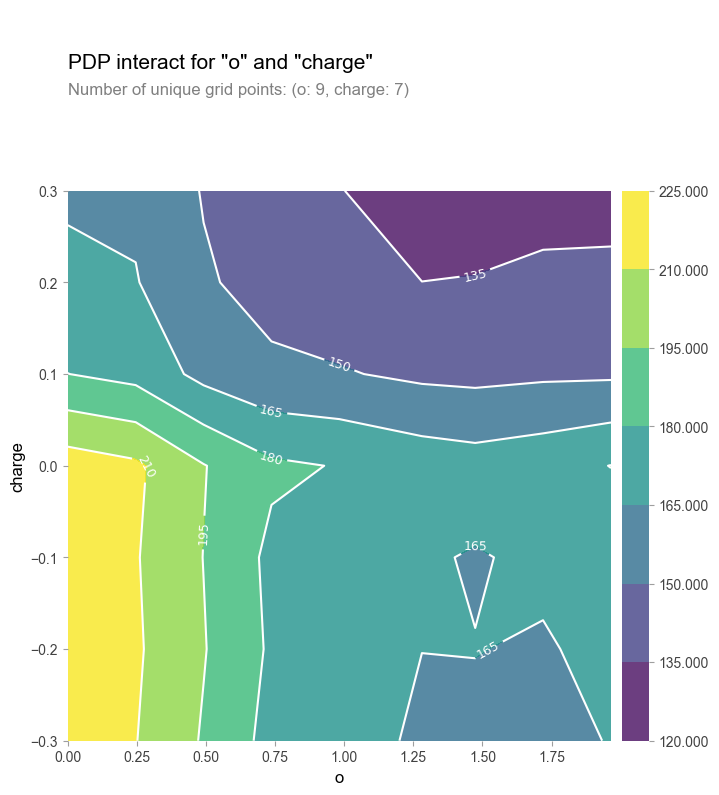

In [41]:
inter1  =  pdp.pdp_interact(model=gb, dataset=X_test, model_features=feature_names, features=['o', 'charge'])
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['o', 'charge'], plot_type='contour')
plt.show()

In [18]:
# 导出预测值和实际值
data_pred = gb.predict(X_test)

In [19]:
df = pd.DataFrame({'actual':y_test,'pred':data_pred})
df

,actual,pred
687,203.42,211.681915
522,249.41,252.218460
56,195.35,197.446136
172,130.06,130.747849
60,227.19,234.846115
...,...,...
135,250.78,253.223572
114,288.29,282.386200
404,208.31,177.915482
181,135.49,128.628418


In [44]:
# 可导出数据origin画图
df.to_csv('water_pred.csv')

In [20]:
data_pred1 = gb.predict(X_train)

In [21]:
df1 = pd.DataFrame({'actual':y_train,'pred':data_pred1})
df1

,actual,pred
323,93.09,90.950745
629,210.09,211.854141
50,231.25,224.602692
170,249.32,245.032242
506,262.42,267.172302
...,...,...
22,268.48,256.121429
547,122.84,121.776604
7,272.09,277.185211
453,128.24,115.159302


In [47]:
df1.to_csv('water_pred_train.csv')

In [48]:
# 评估测试集RMSE,MAE
np.sqrt(mean_squared_error(y_test,data_pred))

13.17544647119731

In [49]:
mean_absolute_error(y_test,data_pred)

10.412253776756492

In [23]:
# 评估训练集RMSE,MAE
np.sqrt(mean_squared_error(y_train,data_pred1)),mean_absolute_error(y_train,data_pred1)

(8.294109790579133, 6.518346534261899)

## ------------------------------------------------------Na离子截留率预测-------------------------------------------------------------------

In [24]:
j=data
j.columns=['h','dg','o','charge','pass-wa','Na rejection','Cl rejection']
j

,h,dg,o,charge,pass-wa,Na rejection,Cl rejection
0,0.7,1.3,0.4913,-0.1,257.92,0.08110,0.10896
1,0.8,1.3,0.0000,-0.1,303.89,0.00000,0.00000
2,0.8,1.3,0.4913,-0.1,289.23,0.15325,0.12594
3,0.8,1.3,0.9825,-0.1,195.35,0.59020,0.59020
4,0.8,1.3,1.4737,-0.1,158.72,1.00000,1.00000
...,...,...,...,...,...,...,...
731,1.0,1.1,1.7190,0.2,150.15,0.74460,0.74460
732,1.1,1.1,0.0000,0.2,194.88,0.64549,0.61000
733,1.1,1.1,0.7369,0.2,191.84,0.56808,0.47550
734,1.1,1.1,1.2810,0.2,186.53,0.49718,0.47204


In [25]:
y1=j['Na rejection']
x1_train,x1_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.2,random_state=82)

In [26]:
param_test1 = {
 'max_depth':range(4,12,1),
 'n_estimators':range(20,220,20),
 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
 'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(), param_grid = param_test1)
gsearch1.fit(x1_train,y1_train)
gsearch1.best_params_,gsearch1.best_score_

({'gamma': 0.1, 'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 140},
 0.8426202548526243)

In [26]:
gb1 = xgb.XGBRegressor(gamma =0.1,learning_rate= 0.08,max_depth = 4,n_estimators = 140)

In [27]:
gb1.fit(x1_train,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=140, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
a1 = gb1.score(x1_train,y1_train)
a1

0.8791308805410488

In [29]:
b1 = gb1.score(x1_test,y1_test)
b1

0.8413004499038865

In [30]:
gb1.feature_importances_

array([0.20025383, 0.41895047, 0.31093422, 0.06986149], dtype=float32)

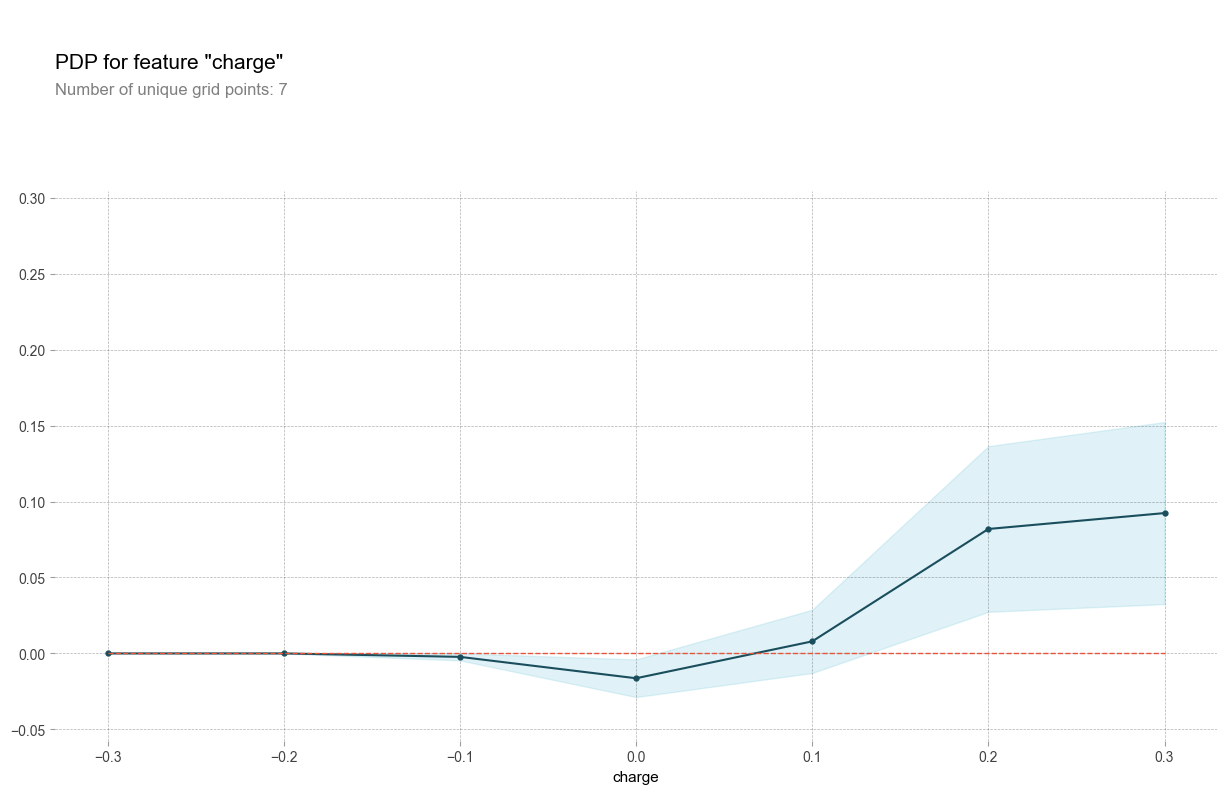

In [56]:
feature_names = ['h','dg','o','charge']
feat_name = 'charge'
pdp_goals1 = pdp.pdp_isolate(model=gb1, dataset=x1_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'charge')
plt.show()

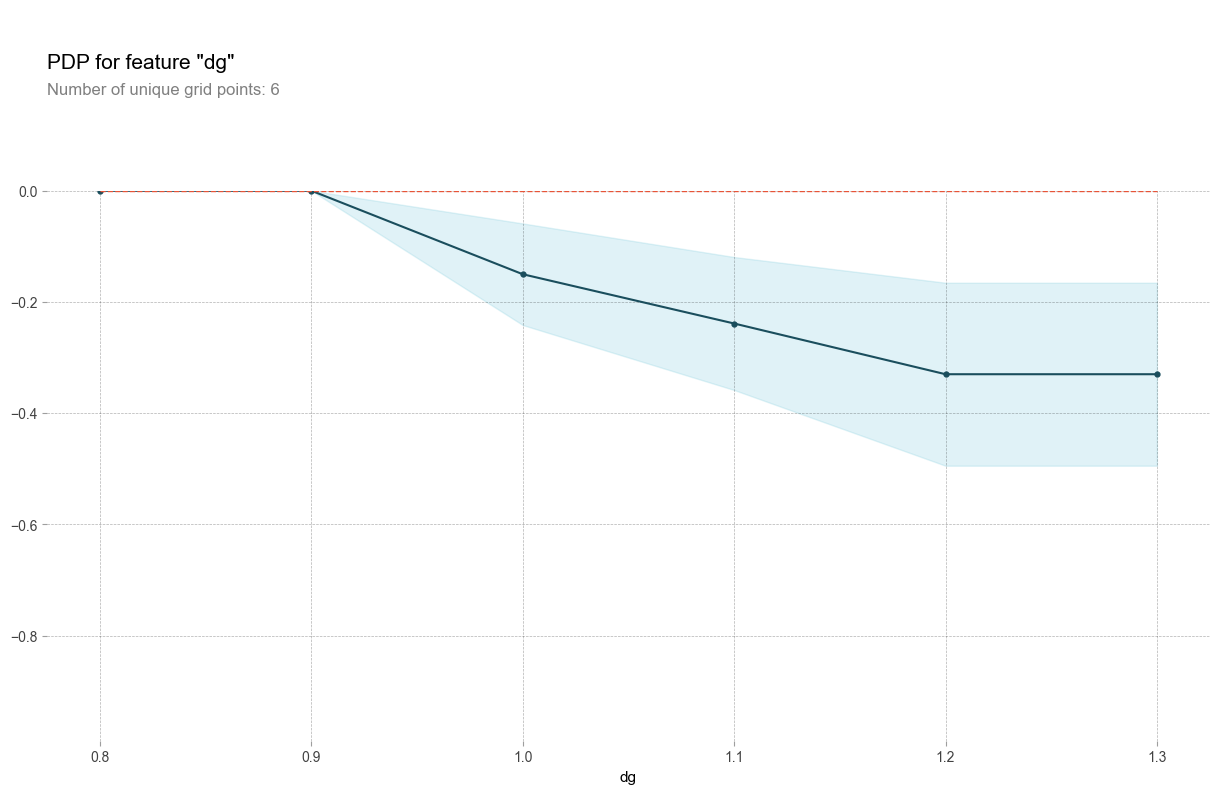

In [57]:
feat_name = 'dg'
pdp_goals1 = pdp.pdp_isolate(model=gb1, dataset=x1_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'dg')
plt.show()

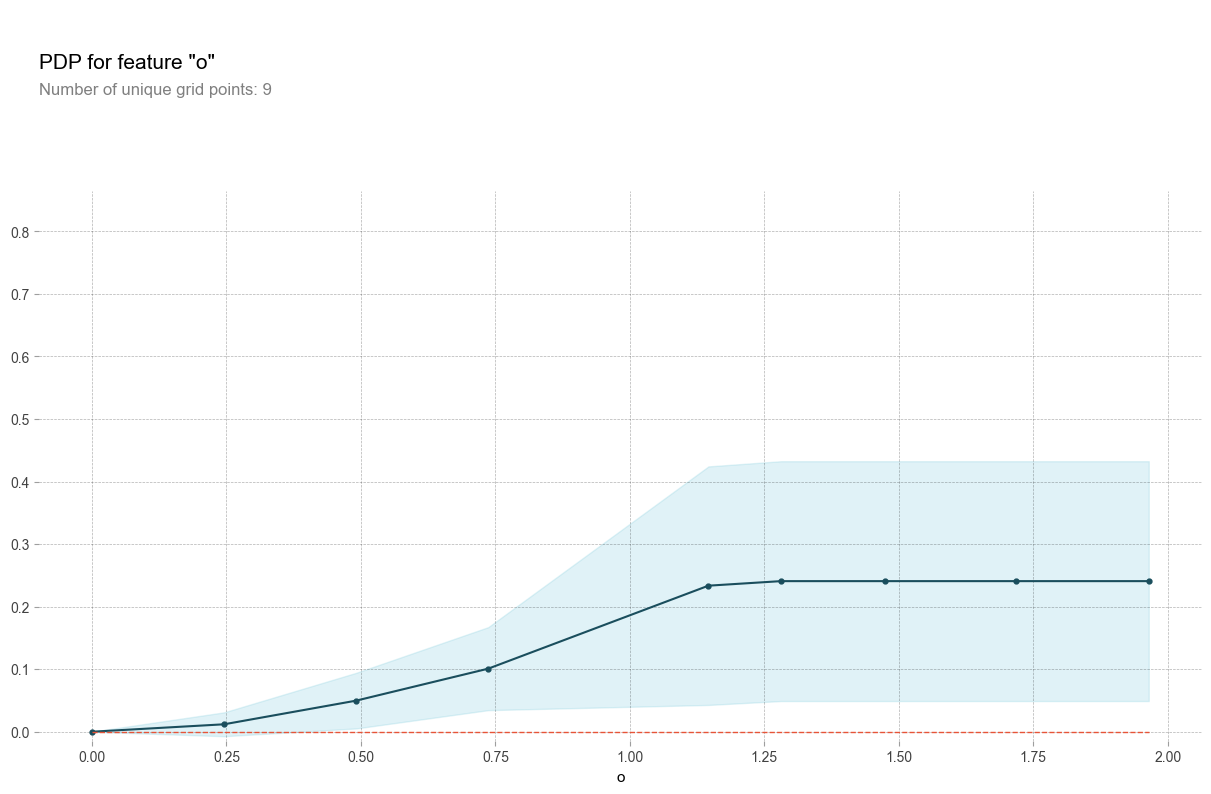

In [58]:
feat_name = 'o'
pdp_goals1 = pdp.pdp_isolate(model=gb1, dataset=x1_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'o')
plt.show()

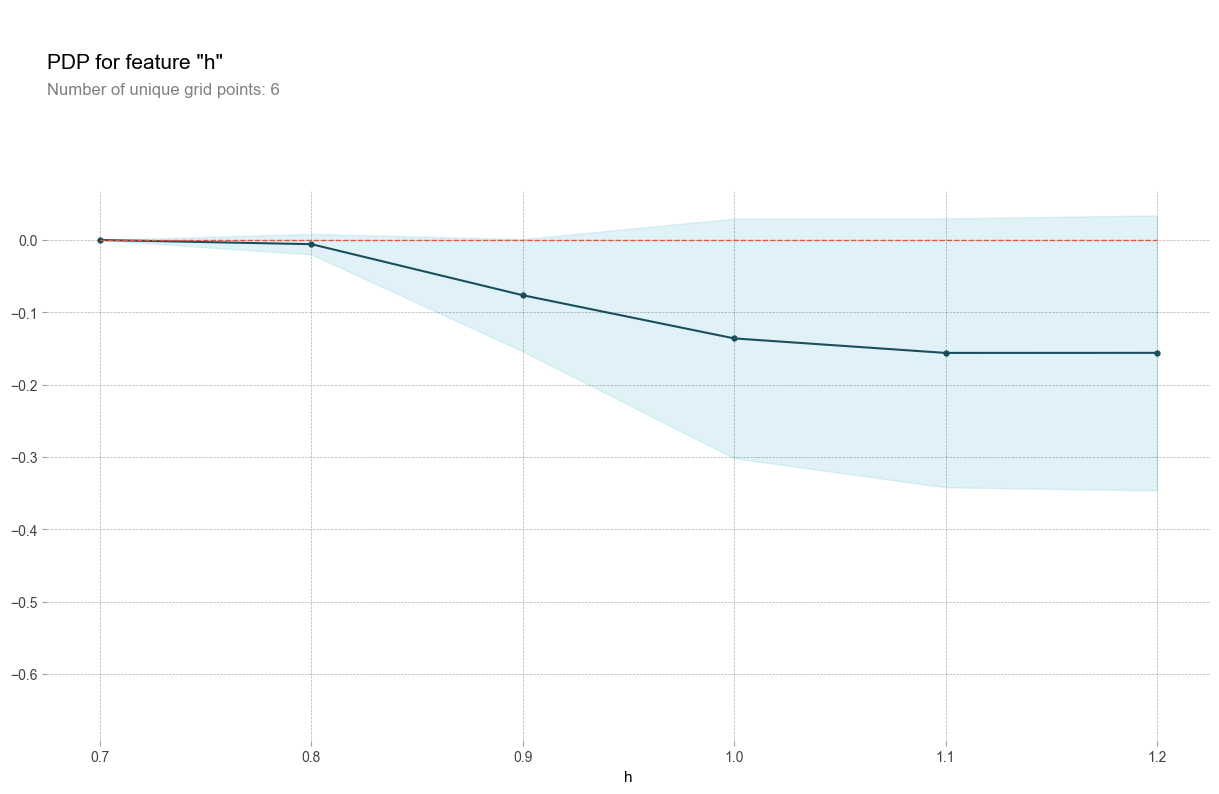

In [59]:
feat_name = 'h'
pdp_goals1 = pdp.pdp_isolate(model=gb1, dataset=X_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'h')
plt.show()

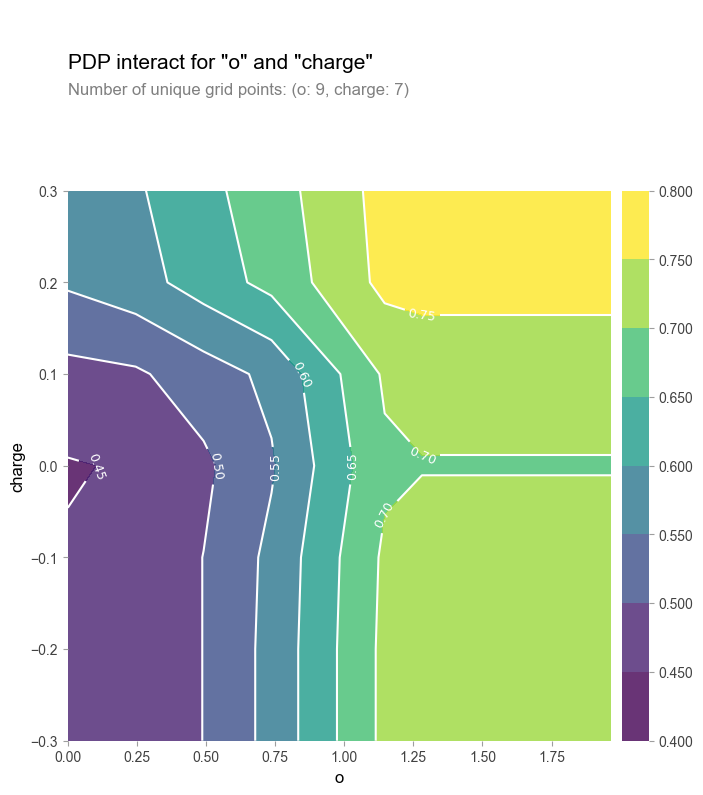

In [60]:
inter1  =  pdp.pdp_interact(model=gb1, dataset=x1_test, model_features=feature_names, features=['o', 'charge'])
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['o', 'charge'], plot_type='contour')
plt.show()

In [31]:
# 导出预测值和实际值
data_pred2 = gb1.predict(x1_test)

In [32]:
df2 = pd.DataFrame({'actual':y1_test,'pred':data_pred2})
df2

,actual,pred
367,0.45480,0.368137
233,0.76190,0.823448
319,0.68136,0.836586
506,0.26446,0.250568
230,0.82095,0.790333
...,...,...
628,0.86478,0.814199
377,0.42295,0.413034
733,0.56808,0.585521
387,0.97560,0.890849


In [39]:
df2.to_csv('na_pred_test.csv')

In [33]:
data_pred3 = gb1.predict(x1_train)

In [34]:
df3 = pd.DataFrame({'actual':y1_train,'pred':data_pred3})
df3

,actual,pred
2,0.15325,0.206854
53,0.08100,0.205511
25,0.93460,0.935275
147,0.32470,0.245832
572,0.53500,0.536770
...,...,...
349,0.09500,0.317586
411,0.44640,0.551253
735,0.52203,0.570298
450,0.88580,0.738096


In [66]:
df3.to_csv('na_pred_train.csv')

In [35]:
# 评估测试集RMSE,MAE
np.sqrt(mean_squared_error(y1_test,data_pred2))

0.09854941653600886

In [36]:
mean_absolute_error(y1_test,data_pred2)

0.07989203306051848

In [39]:
np.sqrt(mean_squared_error(y1_train,data_pred3)),mean_absolute_error(y1_train,data_pred3)

(0.09502302306052875, 0.07621662188030749)

## ------------------------------------------------------Cl离子截留率预测-------------------------------------------------------------------

In [40]:
y2=j['Cl rejection']

In [42]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,y2,test_size=0.2,random_state=40)

In [23]:
param_test1 = {
 'max_depth':range(4,12,1),
 'n_estimators':range(20,220,20),
 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
 'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(), param_grid = param_test1)
gsearch1.fit(x2_train,y2_train)
gsearch1.best_params_,gsearch1.best_score_

({'gamma': 0.1, 'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 120},
 0.8545691904543297)

In [43]:
gb2 = xgb.XGBRegressor(gamma =0.1,learning_rate= 0.09,max_depth = 5,n_estimators = 120)

In [44]:
gb2.fit(x2_train,y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
a2 = gb2.score(x2_train,y2_train)
a2

0.877250443558344

In [46]:
b2 = gb2.score(x2_test,y2_test)
b2

0.8492651213987994

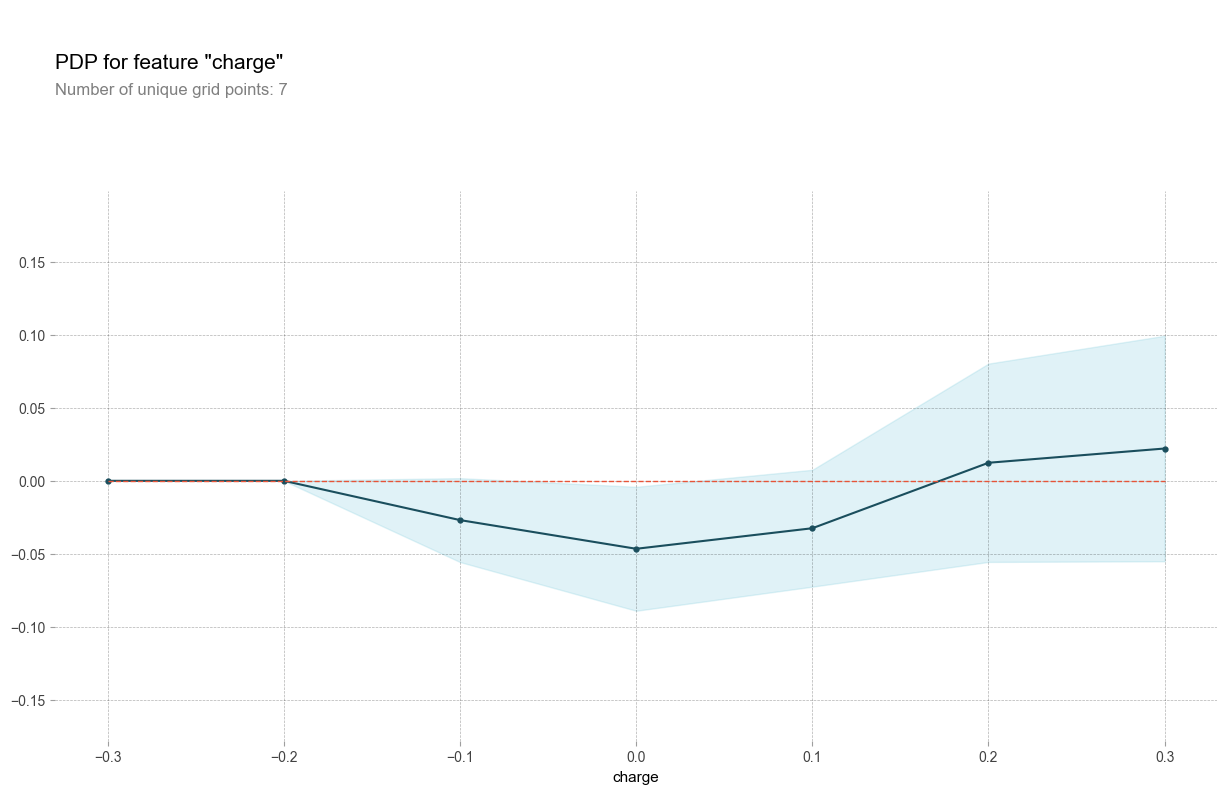

In [73]:
feature_names = ['h','dg','o','charge']
feat_name = 'charge'
pdp_goals1 = pdp.pdp_isolate(model=gb2, dataset=x2_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'charge')
plt.show()

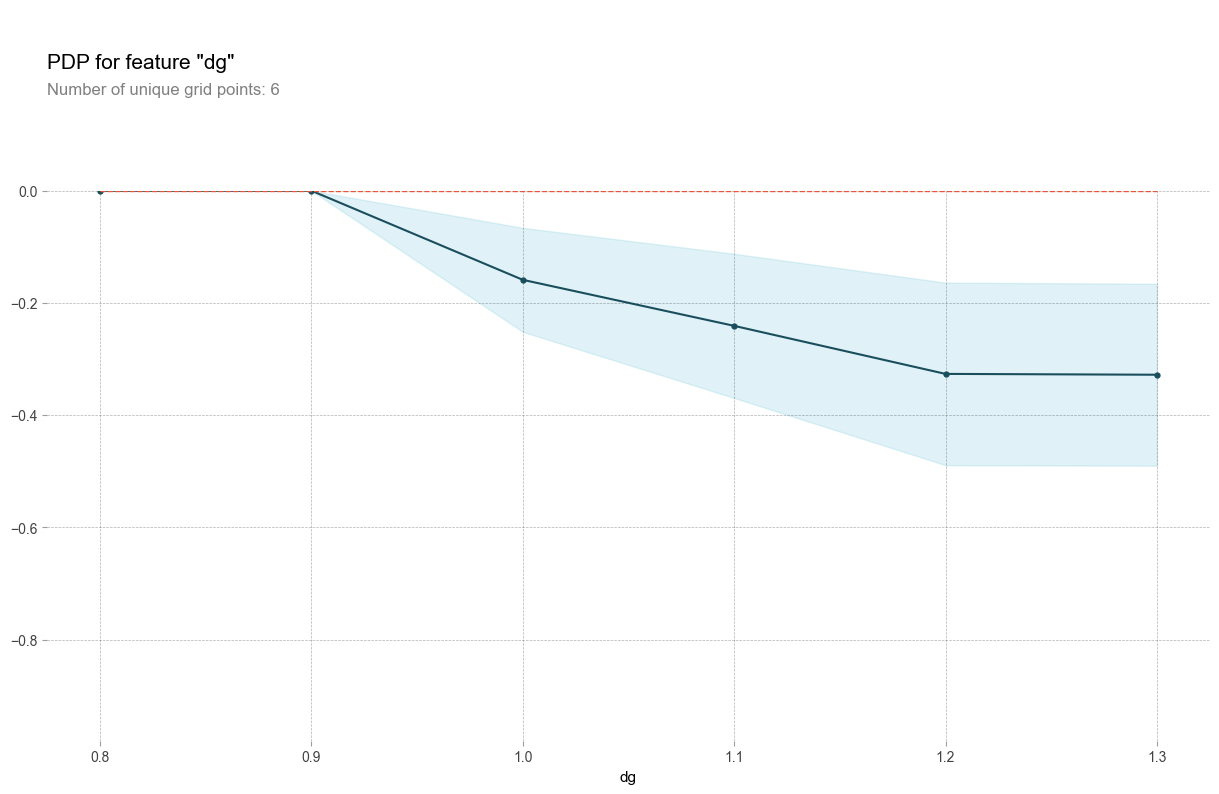

In [74]:
feat_name = 'dg'
pdp_goals1 = pdp.pdp_isolate(model=gb2, dataset=x2_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'dg')
plt.show()

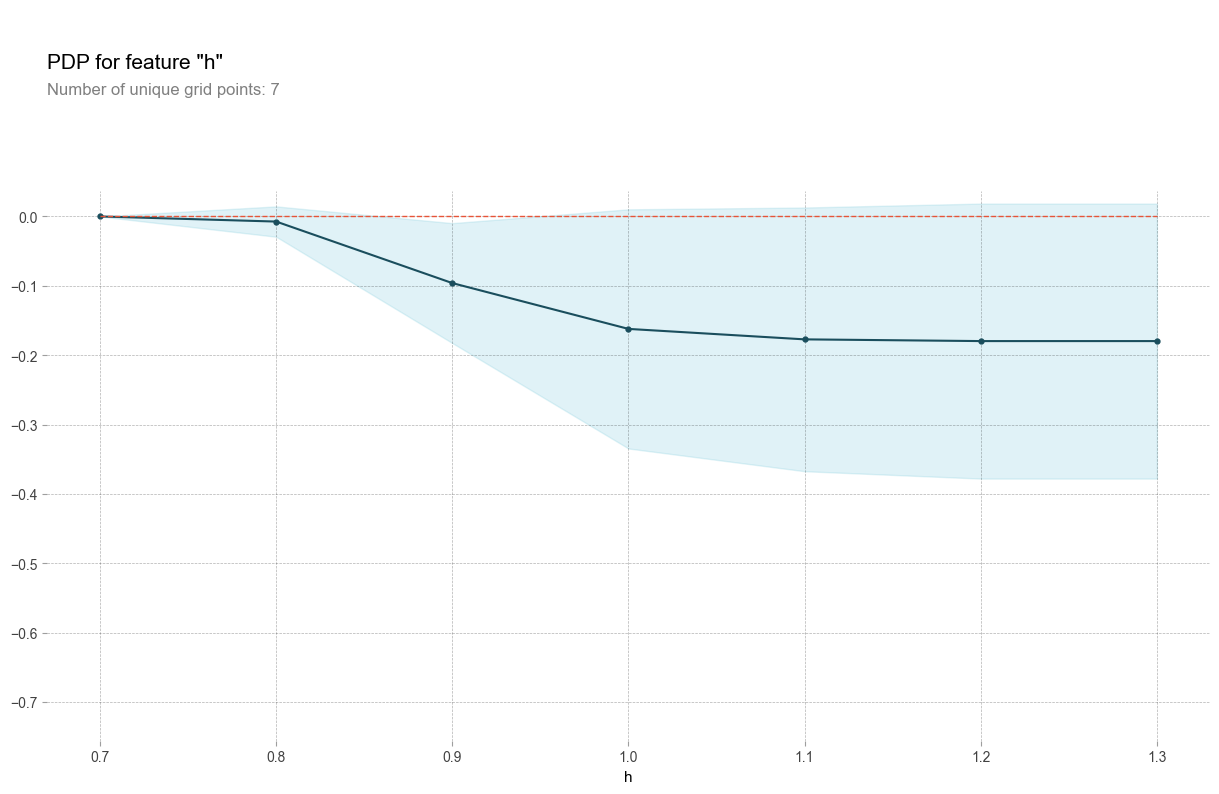

In [75]:
feat_name = 'h'
pdp_goals1 = pdp.pdp_isolate(model=gb2, dataset=x2_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'h')
plt.show()

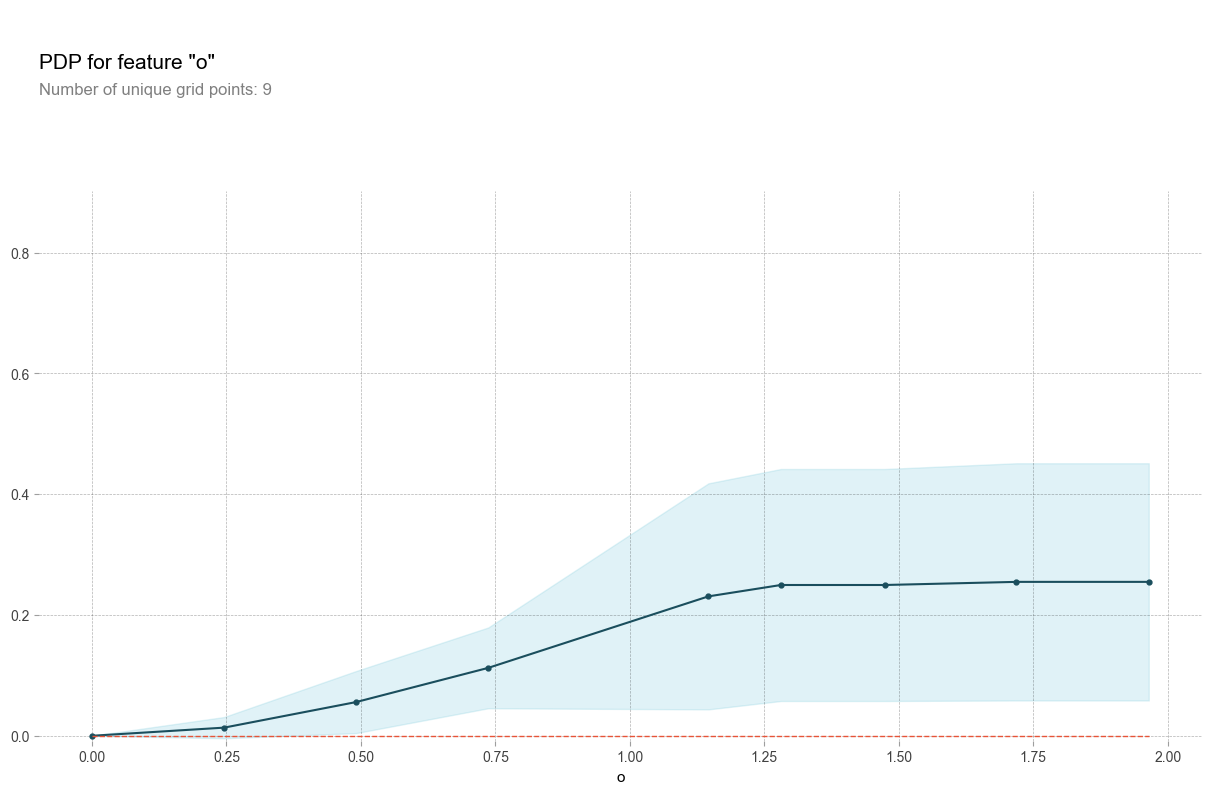

In [76]:
feat_name = 'o'
pdp_goals1 = pdp.pdp_isolate(model=gb2, dataset=x2_test, model_features=feature_names, feature=feat_name)
pdp.pdp_plot(pdp_goals1, 'o')
plt.show()

In [47]:
# 导出预测值和实际值
data_pred3 = gb2.predict(x2_test)

In [48]:
df3 = pd.DataFrame({'actual':y2_test,'pred':data_pred3})
df3

,actual,pred
450,0.84770,0.710820
463,0.67190,0.721865
335,0.62640,0.455722
331,0.94348,0.744712
333,0.09325,0.252335
...,...,...
426,0.65080,0.694827
140,0.30638,0.263036
62,1.00000,0.940058
457,0.65080,0.694827


In [79]:
df3.to_csv('cl_pred_test.csv')

In [49]:
# 导出预测值和实际值
data_pred4 = gb2.predict(x2_train)

In [50]:
df4 = pd.DataFrame({'actual':y2_train,'pred':data_pred4})
df4

,actual,pred
166,0.29025,0.276957
334,0.19540,0.252335
388,1.00000,0.952021
106,0.35388,0.350541
724,0.53969,0.605222
...,...,...
440,0.50930,0.721865
165,0.34630,0.444801
7,0.21504,0.234132
219,1.00000,0.952944


In [51]:
# 评估测试集RMSE,MAE
np.sqrt(mean_squared_error(y2_test,data_pred3))

0.10751189928086939

In [52]:
mean_absolute_error(y2_test,data_pred3)

0.08640152111572832

In [53]:
# 评估测试集RMSE,MAE
np.sqrt(mean_squared_error(y2_train,data_pred4)),mean_absolute_error(y2_train,data_pred4)

(0.09272059779523008, 0.07507242952998318)

In [82]:
df4.to_csv('cl_pred_train.csv')

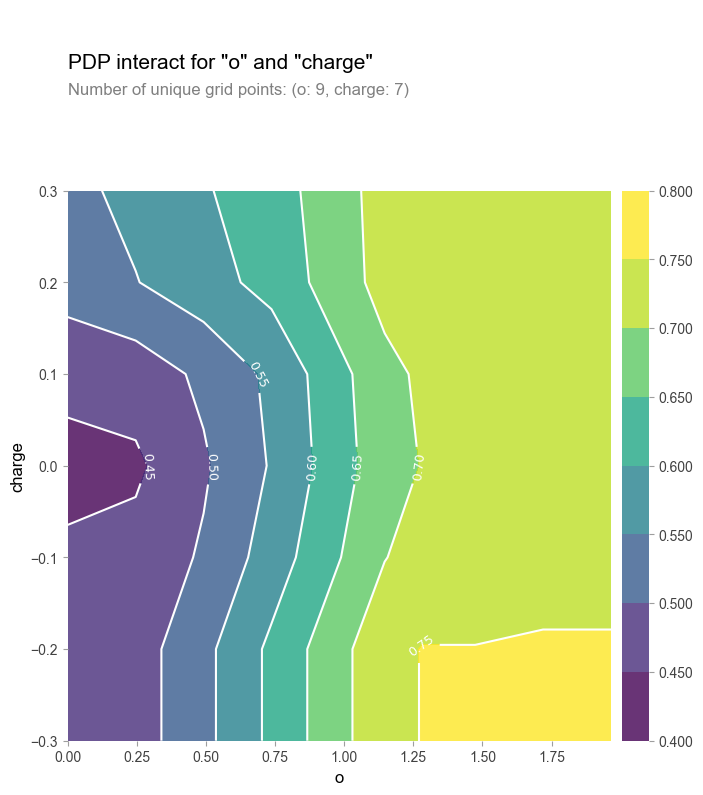

In [83]:
inter1  =  pdp.pdp_interact(model=gb2, dataset=x2_test, model_features=feature_names, features=['o', 'charge'])
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['o', 'charge'], plot_type='contour')
plt.show()

In [84]:
gb2.feature_importances_

array([0.22479402, 0.41124532, 0.30335557, 0.06060504], dtype=float32)